In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")
#here you can since i neeeded to check the graph i manually put all the datasets 
#remove the comment text to do it 
#text = pd.read_csv('NEWS.csv', encoding = "ISO-8859-1") can be done
#text.shape()
text = ("Statement US undersecretary Uzra Zeya coming to Nepal, Election Commission bars corruption-accused rural municipality chief in Kailali from assuming office, House tells govt to investigate 8-year-old rape case involving beauty pageant organiser, Birgunj: 6 injured in UML’s attack on Nepali Congress victory rally, The new term of local governments begins today, but over 100 units are yet to elect officials, Do 2022 local elections mark the death of alternative forces in Nepal?, Understanding Balen Shah’s likely victory as Kathmandu mayor in 5 points, Chinese Ambassador Hou Yanqi calls on Home Minister Khand, Local elections offered a face-saver to the UML to end the 9-month House obstruction. Now, all parties need to learn a lesson, UML discontinues parliament obstruction after 9 months, Naveen Srivastava appointed Indian ambassador to Nepal , House approves nominations for ambassadors to China, South Africa, Local elections expose major political leaders losing grip on their own areas, Modi in Lumbini: Nepal, India sign 6 agreement, Biplav’s party fails to win any position in its stronghold of Rolpa, Balen Shah for Kathmandu mayor: Is it too early to be certain?, Trailing behind, UML accuses the ruling alliance of poll rigging, As Balen Shah’s lead continues to excite Kathmandu, the slow vote count across Nepal frustrates the nation, Lalitpur: More votes for nonexistent Nepali Congress deputy mayor candidate than for the one it supports, Local elections: Some independent and rebel candidates also steal the show along with major forces’ picks,  Nepal local elections: Commission estimates 64% voter turnout, polls get rescheduled at 77 voting centres in 28 units, Election Commission seeks clarification from Baburam Bhattarai for making his ballot public, Nepal local elections: Vote count to begin tonight in most places, (Updated) Elections to be held on Monday in Dakneshwori of Saptari, Birgunj: Police confiscate umbrellas from JSPN office near polling station, 2 missing from Rolpa following an interparty clash on the eve of voting, (Updated) Nepal local elections: 41% voter turnout as of 2:00 pm, Voting in Rukum East is yet to begin due to a tussle between Nepali Congress and Maoists, Rajesh Hamal hints at joining politics as he casts his vote, Local elections: Voting underway peacefully in general except for some sporadic cases of violence, Nepal local elections: Elderly’s excitement sparks hope for the growth of grassroots democracy, Nepal holding nationwide local elections today, Police briefly detain Dharmendra Bastola, the chief of CPN-Majority, Bipalv Maoists’ splinter group, Indian Air Force aircraft arrives in Lumbini to prepare for Modi’s visit, New voters to get their voter id cards today and tomorrow, Nepal and Israel mark 62 years of diplomatic relations, Peaceful elections in Nepal: An achievement of democratic practices for 75 years, Election Commission rejects former chief Ayodhi Prasad Yadav’s poll observation application,  PM Deuba in Dadeldhura for local elections, to return to office after voting only, Kapilvastu: Nepali Congress deputy mayoral candidate dies, Is Nepal ready for the right to reject (NOTA) in voting? Here are some pointers to consider, Dang: Voting in one ward to get postponed as UML’s chair candidate dies, Local elections: Commission to publish results by May 19,")
doc = nlp(text)
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Statement US undersecretary Uzra Zeya', 'Nepal', 'Election Commission', 'corruption-accused rural municipality chief', 'Kailali', 'office', 'House', 'govt', '8-year-old rape case', 'beauty pageant organiser', 'Birgunj', 'UML', 'Nepali Congress victory rally', 'The new term', 'local governments', 'over 100 units', 'officials', '2022 local elections', 'the death', 'alternative forces', 'Nepal', 'Understanding Balen Shah', 'likely victory', 'Kathmandu mayor', '5 points', 'Chinese Ambassador Hou Yanqi', 'Home Minister Khand', 'Local elections', 'a face-saver', 'the UML', 'the 9-month House obstruction', 'all parties', 'a lesson', 'UML', 'parliament obstruction', '9 months', 'Naveen Srivastava', 'Indian ambassador', 'Nepal', 'House', 'nominations', 'ambassadors', 'China', 'South Africa', 'Local elections', 'major political leaders', 'grip', 'their own areas', 'Lumbini', 'Nepal', 'India', '6 agreement', 'Biplav’s party', 'any position', 'its stronghold', 'Rolpa', 'Balen Shah'

In [19]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [20]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

In [21]:
def printToken(token):
    print(token.text, "->", token.dep_)

In [22]:
def appendChunk(original, chunk):
    return original + ' ' + chunk

In [23]:
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

In [24]:
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)
    

In [25]:
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

In [26]:
def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

In [27]:
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

In [30]:
text = input('Enter the string to question and answer ') 

Enter the string to question and answer balen shah result of the election in NEPAL


balen shah result of the election in NEPAL
balen -> compound
shah -> compound
result -> ROOT
of -> prep
the -> det
election -> pobj
in -> prep
NEPAL -> pobj
 , result , election NEPAL


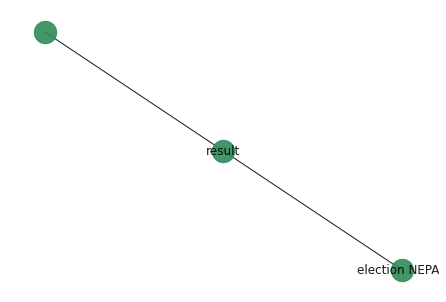

In [31]:
    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print(text)
    for sentence in sentences:
        triples.append(processSentence(sentence))

    printGraph(triples)